In [ ]:
print('Data preprocessing started')

Data preprocessing started


In [1]:
# reading data on google drive
from google.colab import drive
# Mount your Google Drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

# Load CSV file from Google Drive
file_path = '/content/drive/MyDrive/other/data/Data for MSC Thesis/eth_householdgeovariables_y5.csv'
df = pd.read_csv(file_path)

print(df.head())

Mounted at /content/drive
        household_id  dist_road  dist_market  dist_border  dist_popcenter  \
0  20101010100104011        7.7   162.300003    82.900002             0.4   
1  20101010100104022        7.7   162.300003    82.900002             0.4   
2  20101010100104033        7.7   162.300003    82.900002             0.4   
3  20101010100104044        7.7   162.300003    82.900002             0.4   
4  20101010100104055        7.7   162.300003    82.900002             0.4   

   dist_admhq  af_bio_1_x  af_bio_8_x  af_bio_12_x  af_bio_13_x  ...  \
0         0.0         283         307          184           47  ...   
1         0.0         283         307          184           47  ...   
2         0.0         283         307          184           47  ...   
3         0.0         283         307          184           47  ...   
4         0.0         283         307          184           47  ...   

   c2_evimax_avg  c2_grn_avg  c2_sen_avg  c2_h2021_eviarea  c2_h2021_evimax  \

In [2]:
# ------------------------------
# DATA EXPLORATION: NULL AND OUTLIER PERCENTAGE
# ------------------------------

# ------------------------------
# Step 1: Dataset Overview
# ------------------------------
print("----- Dataset Info -----")
print(df.info())

print("\n----- Dataset Shape -----")
print(df.shape)

print("\n----- Statistical Summary -----")
print(df.describe())

# ------------------------------
# Step 2: Missing Values by Percentage
# ------------------------------
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\n----- Missing Values Summary -----")
print(missing_df.sort_values(by='Percentage', ascending=False))

# ------------------------------
# Step 3: Outlier Detection by Percentage (Numeric Columns Only)
# ------------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

outlier_summary = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100

    outlier_summary.append([col, outlier_count, outlier_percent])

outlier_df = pd.DataFrame(outlier_summary, columns=['Column', 'Outlier Count', 'Outlier %'])
print("\n----- Outlier Summary by Percentage -----")
print(outlier_df.sort_values(by='Outlier %', ascending=False))

----- Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890 entries, 0 to 4889
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   household_id       4890 non-null   int64  
 1   dist_road          4890 non-null   float64
 2   dist_market        4890 non-null   float64
 3   dist_border        4890 non-null   float64
 4   dist_popcenter     4890 non-null   float64
 5   dist_admhq         4890 non-null   float64
 6   af_bio_1_x         4890 non-null   int64  
 7   af_bio_8_x         4890 non-null   int64  
 8   af_bio_12_x        4890 non-null   int64  
 9   af_bio_13_x        4890 non-null   int64  
 10  af_bio_16_x        4890 non-null   int64  
 11  afmnslp_pct        4890 non-null   int64  
 12  srtm_1k            4890 non-null   int64  
 13  popdensity         4890 non-null   int64  
 14  cropshare          4890 non-null   int64  
 15  sq1                4890 non-null   int64  
 16 

In [ ]:
# ------------------------------
# FULL PREPROCESSING PIPELINE WITH SMOTE (NO WARNINGS)
# ------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# ------------------------------
# Step 1: Drop irrelevant/empty columns
# ------------------------------
drop_cols = [col for col in df.columns if col == "household_id" or col.startswith("c2_")]
df = df.drop(columns=drop_cols, errors="ignore")

# ------------------------------
# Step 2: Impute missing values (no chained assignment)
# ------------------------------
df['lat_dd_mod'] = df['lat_dd_mod'].fillna(df['lat_dd_mod'].median())
df['lon_dd_mod'] = df['lon_dd_mod'].fillna(df['lon_dd_mod'].median())


# ------------------------------
# Step 4: Encode categorical variables
# ------------------------------
categorical_cols = ['ssa_aez09', 'landcov']
categorical_cols = [col for col in categorical_cols if col in df.columns]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

🔧 UPDATED DATA PREPROCESSING WITH ACCESSIBILITY INDEX

1. CREATING ACCESSIBILITY INDEX (TARGET)
--------------------------------------------------
AI_pca1 created ✓  Range: -1.564 to 8.621
Accessibility Classes: {'Low': 1656, 'Medium': 1620, 'High': 1614}
✅ Target variables created successfully!

2. FEATURE ENGINEERING
--------------------------------------------------
📋 Available features: 9 found

3. HANDLING MISSING VALUES
--------------------------------------------------
Before imputation: 13262 missing values
Final features: 9

4. DATA SPLITTING AND SCALING
--------------------------------------------------
Train set: (3912, 9), Test set: (978, 9)
Scaling completed ✓

5. EXPLORATORY DATA ANALYSIS
--------------------------------------------------


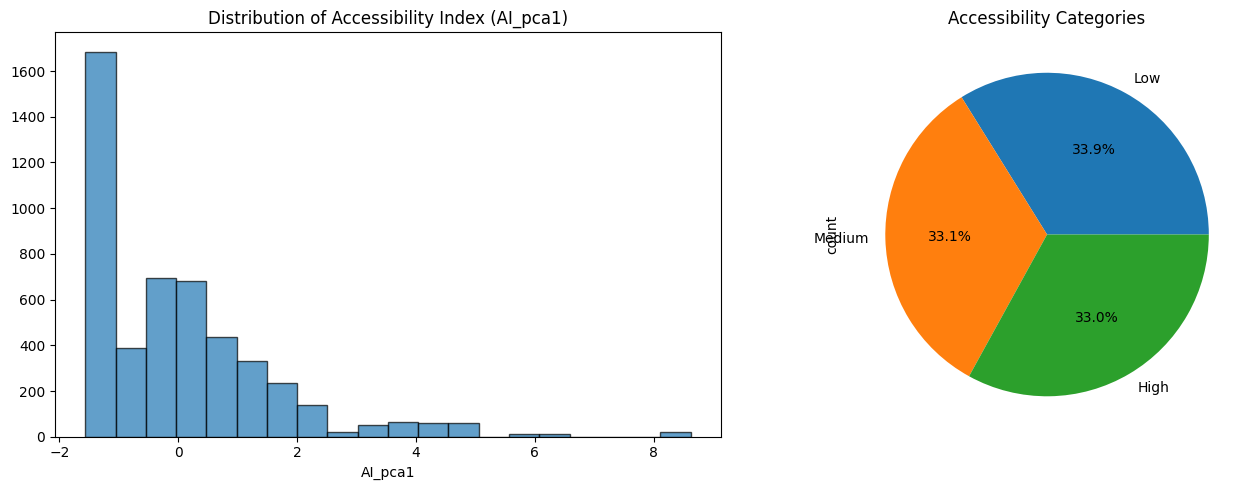


 Top correlated features with AI_pca1:
af_bio_1_x       0.320683
af_bio_8_x       0.318874
lat_dd_mod       0.312295
af_bio_12_x      0.235518
af_bio_13_x      0.190812
c2_evimax_avg    0.152072
c2_sen_avg       0.091294
lon_dd_mod       0.064544
dtype: float64

✅ PREPROCESSING COMPLETED SUCCESSFULLY!

 SUMMARY:
• Continuous target: AI_pca1
• Classification target: AI_class_3 (High/Medium/Low)
• Features used: 9
• Training samples: 3912
• Test samples: 978
• Scaling: DONE
• Missing value handling: DONE

 Ready for Regression + Classification Modeling!

Preprocessed data stored ✓


In [4]:
# =============================================================================
# CELL 1: COMPREHENSIVE DATA PREPROCESSING (UPDATED WITH AI + CLASS TARGET)
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

print("🔧 UPDATED DATA PREPROCESSING WITH ACCESSIBILITY INDEX")
print("=" * 60)

# =============================================================================
# 1. CREATE TARGET VARIABLE: ACCESSIBILITY INDEX (AI)
# =============================================================================
print("\n1. CREATING ACCESSIBILITY INDEX (TARGET)")
print("-" * 50)

# 5 distance columns (required for AI)
dist_cols = ['dist_road', 'dist_market', 'dist_popcenter',
             'dist_border', 'dist_admhq']
#'dist_road','dist_market','dist_admhq','dist_popcenter','dist_border'

# --- Standardize distance variables ---
scaler_ai = StandardScaler()
Z = scaler_ai.fit_transform(df[dist_cols])

# --- PCA to compute Accessibility Index ---
pca = PCA(n_components=1)
df['AI_pca1'] = pca.fit_transform(Z)[:, 0]  # continuous target

print(f"AI_pca1 created ✓  Range: {df['AI_pca1'].min():.3f} to {df['AI_pca1'].max():.3f}")

# ------------------------------
# Create 3-class Accessibility Category
# ------------------------------
q33 = df['AI_pca1'].quantile(0.33)
q66 = df['AI_pca1'].quantile(0.66)

def classify_access(x):
    if x <= q33:
        return "High"       # best access
    elif x <= q66:
        return "Medium"
    else:
        return "Low"        # worst access

df['accessibility_category'] = df['AI_pca1'].apply(classify_access)

print("Accessibility Classes:", df['AI_class_3'].value_counts().to_dict())
print("✅ Target variables created successfully!")

# =============================================================================
# 2. FEATURE SELECTION (KEEP YOUR STRUCTURE)
# =============================================================================
print("\n2. FEATURE ENGINEERING")
print("-" * 50)

feature_categories = {
    'climate_features': ['af_bio_1_x', 'af_bio_8_x', 'af_bio_12_x', 'af_bio_13_x'],
    'vegetation_features': ['c2_evimax_avg', 'c2_grn_avg', 'c2_sen_avg'],
    'location_features': ['lat_dd_mod', 'lon_dd_mod']
}

all_features = []
for category in feature_categories.values():
    all_features.extend(category)

available_features = [f for f in all_features if f in df.columns]
print(f"📋 Available features: {len(available_features)} found")

# =============================================================================
# 3. HANDLE MISSING VALUES
# =============================================================================
print("\n3. HANDLING MISSING VALUES")
print("-" * 50)

X = df[available_features].copy()
y = df['AI_pca1']          # continuous target
y_class = df['AI_class_3'] # classification target

print("Before imputation:", X.isnull().sum().sum(), "missing values")

imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Remove constant features
constant_features = X_imputed.columns[X_imputed.nunique() == 1]
if len(constant_features):
    print("Removing constant features:", list(constant_features))
    X_imputed = X_imputed.drop(columns=constant_features)
    available_features = [f for f in available_features if f not in constant_features]

print(f"Final features: {len(available_features)}")

# =============================================================================
# 4. DATA SPLITTING AND SCALING
# =============================================================================
print("\n4. DATA SPLITTING AND SCALING")
print("-" * 50)

X_train, X_test, y_train, y_test, y_train_c, y_test_c = train_test_split(
    X_imputed, y, y_class, test_size=0.2, random_state=42,
    stratify=y_class
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")
print("Scaling completed ✓")

# =============================================================================
# 5. EDA PLOTS
# =============================================================================
print("\n5. EXPLORATORY DATA ANALYSIS")
print("-" * 50)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of AI
axes[0].hist(df['AI_pca1'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_title("Distribution of Accessibility Index (AI_pca1)")
axes[0].set_xlabel("AI_pca1")

# Category distribution
df['AI_class_3'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title("Accessibility Categories")

plt.tight_layout()
plt.show()

# Correlation analysis
print("\n Top correlated features with AI_pca1:")
correlations = X_imputed.corrwith(y).abs().sort_values(ascending=False)
print(correlations.head(8))

# =============================================================================
# SUMMARY
# =============================================================================
print("\n" + "=" * 60)
print("✅ PREPROCESSING COMPLETED SUCCESSFULLY!")
print("=" * 60)

print(f"""
 SUMMARY:
• Continuous target: AI_pca1
• Classification target: AI_class_3 (High/Medium/Low)
• Features used: {len(available_features)}
• Training samples: {X_train.shape[0]}
• Test samples: {X_test.shape[0]}
• Scaling: DONE
• Missing value handling: DONE

 Ready for Regression + Classification Modeling!
""")

# Store for modeling
preprocessed_data = {
    'X_train': X_train_scaled,
    'X_test': X_test_scaled,
    'y_train': y_train,          # regression target
    'y_test': y_test,
    'y_train_class': y_train_c,  # classification target
    'y_test_class': y_test_c,
    'feature_names': available_features,
    'scaler': scaler,
    'X_original': X_imputed
}

print("Preprocessed data stored ✓")


In [5]:
# %% CELL 1 - IMPORTS & LOAD PREPROCESSED DATA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# Optional model imports (XGBoost / LightGBM). If not installed, code gracefully skips them.
try:
    from xgboost import XGBRegressor, XGBClassifier
    xgb_available = True
except Exception:
    xgb_available = False

try:
    from lightgbm import LGBMRegressor, LGBMClassifier
    lgb_available = True
except Exception:
    lgb_available = False

# Load preprocessed data (created previously)
# The preprocessing cell should have created a dict named `preprocessed_data`
# with keys: 'X_train', 'X_test', 'y_train', 'y_test', 'y_train_class', 'y_test_class', 'feature_names', 'scaler', 'X_original'
try:
    pdata = preprocessed_data
except NameError:
    raise RuntimeError("preprocessed_data not found. Run the preprocessing cell first.")

X_train = pd.DataFrame(pdata['X_train'], columns=pdata['feature_names'])
X_test = pd.DataFrame(pdata['X_test'], columns=pdata['feature_names'])
y_train_reg = pdata['y_train'].reset_index(drop=True)
y_test_reg = pdata['y_test'].reset_index(drop=True)
y_train_clf = pdata['y_train_class'].reset_index(drop=True)
y_test_clf = pdata['y_test_class'].reset_index(drop=True)

print("Loaded preprocessed data:")
print(" X_train:", X_train.shape, " X_test:", X_test.shape)
print(" y_train (reg):", y_train_reg.shape, " y_test (reg):", y_test_reg.shape)
print(" y_train (clf) value counts:\n", y_train_clf.value_counts())


Loaded preprocessed data:
 X_train: (3912, 9)  X_test: (978, 9)
 y_train (reg): (3912,)  y_test (reg): (978,)
 y_train (clf) value counts:
 AI_class_3
Low       1325
Medium    1296
High      1291
Name: count, dtype: int64


Training LinearRegression...
 LinearRegression  RMSE: 1.3546  R2: 0.2899
Training Ridge(alpha=1.0)...
 Ridge(alpha=1.0)  RMSE: 1.3546  R2: 0.2898
Training RandomForest...
 RandomForest  RMSE: 0.0554  R2: 0.9988
Training XGBoost...
 XGBoost  RMSE: 0.0555  R2: 0.9988
Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1306
[LightGBM] [Info] Number of data points in the train set: 3912, number of used features: 9
[LightGBM] [Info] Start training from score -0.004755
 LightGBM  RMSE: 0.0594  R2: 0.9986


,model,RMSE,R2
2,RandomForest,0.055431,0.998811
3,XGBoost,0.055504,0.998808
4,LightGBM,0.059384,0.998635
0,LinearRegression,1.354563,0.289904
1,Ridge(alpha=1.0),1.354632,0.289832


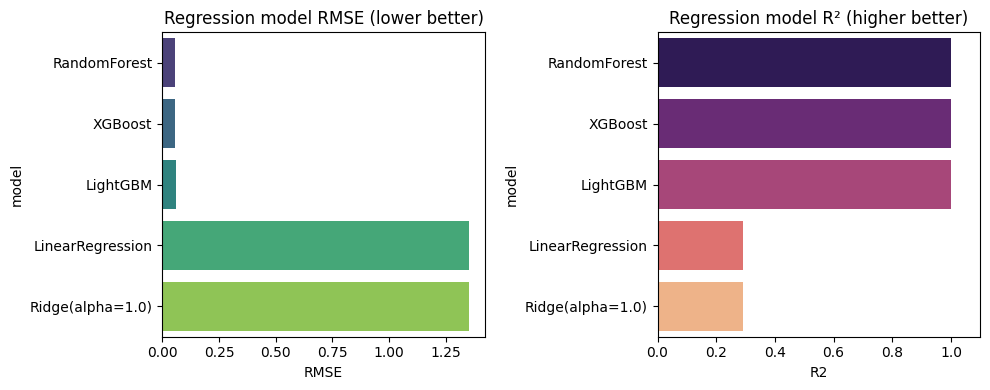


Using RandomForest for feature-importance (permutation importance).


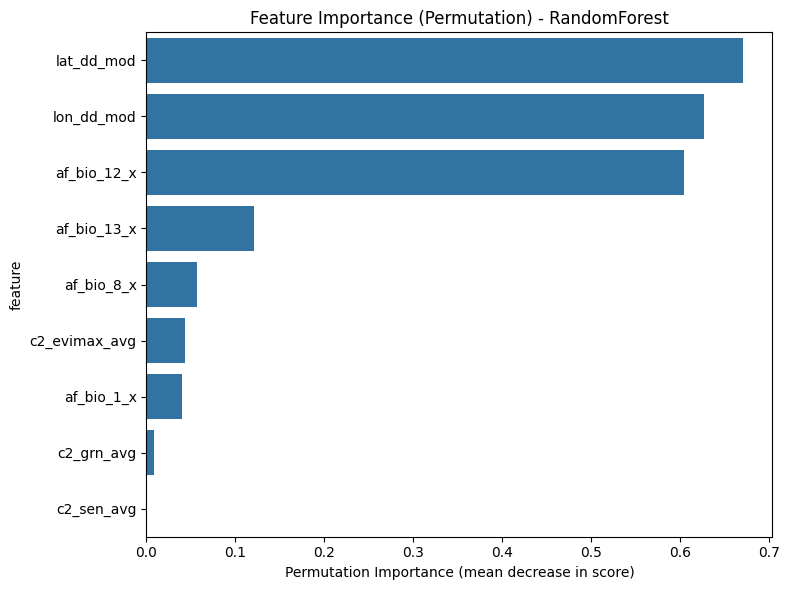

Top features: ['lat_dd_mod', 'lon_dd_mod', 'af_bio_12_x']


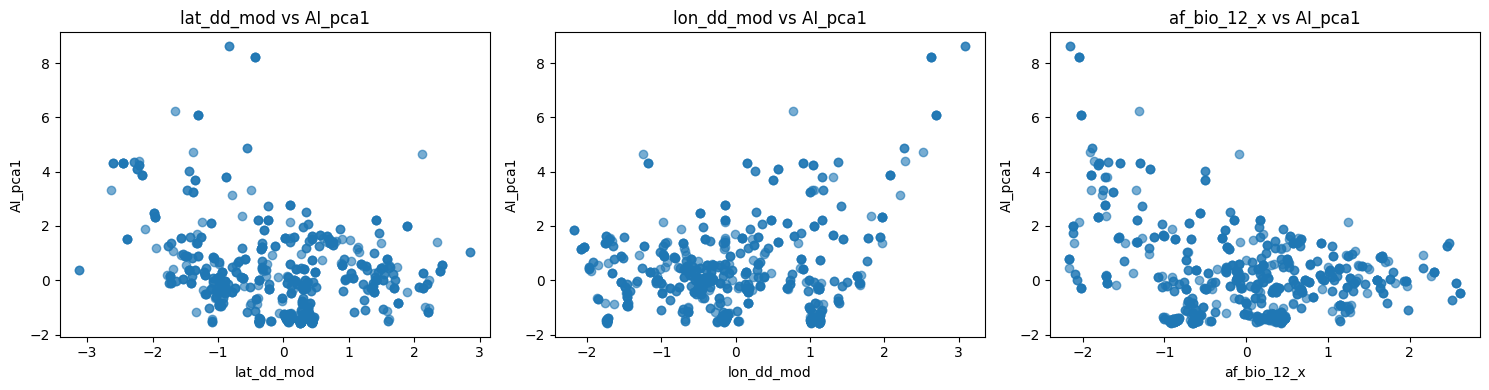

In [6]:
# %% CELL 2 - REGRESSION: TRAIN MODELS + COMPARE (RMSE, R2) + FEATURE IMPORTANCE
import math

# 1) Define models to try
models_reg = {
    "LinearRegression": LinearRegression(),
    "Ridge(alpha=1.0)": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
}
if xgb_available:
    models_reg["XGBoost"] = XGBRegressor(n_estimators=200, random_state=42, verbosity=0, n_jobs=1)
if lgb_available:
    models_reg["LightGBM"] = LGBMRegressor(n_estimators=200, random_state=42, n_jobs=-1)

results_reg = []
fitted_models_reg = {}

for name, model in models_reg.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train_reg)
    preds = model.predict(X_test)
    rmse = math.sqrt(mean_squared_error(y_test_reg, preds))
    r2 = r2_score(y_test_reg, preds)
    results_reg.append((name, rmse, r2))
    fitted_models_reg[name] = model
    print(f" {name}  RMSE: {rmse:.4f}  R2: {r2:.4f}")

# 2) Results table & bar plots
res_df = pd.DataFrame(results_reg, columns=["model", "RMSE", "R2"]).sort_values("RMSE")
display(res_df)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x="RMSE", y="model", data=res_df, palette="viridis")
plt.title("Regression model RMSE (lower better)")

plt.subplot(1,2,2)
sns.barplot(x="R2", y="model", data=res_df, palette="magma")
plt.title("Regression model R² (higher better)")
plt.xlim(0, max(1, res_df['R2'].max()*1.1))
plt.tight_layout()
plt.show()

# 3) Feature importance:
# Use permutation importance (model-agnostic) on best model by RMSE
best_name = res_df.iloc[0]['model']
best_model = fitted_models_reg[best_name]
print(f"\nUsing {best_name} for feature-importance (permutation importance).")

perm = permutation_importance(best_model, X_test, y_test_reg, n_repeats=20, random_state=42, n_jobs=-1)
perm_idx = np.argsort(perm.importances_mean)[::-1]

fi_df = pd.DataFrame({
    'feature': X_test.columns[perm_idx],
    'importance_mean': perm.importances_mean[perm_idx],
    'importance_std': perm.importances_std[perm_idx]
})

plt.figure(figsize=(8,6))
sns.barplot(x='importance_mean', y='feature', data=fi_df.head(15), orient='h')
plt.xlabel("Permutation Importance (mean decrease in score)")
plt.title(f"Feature Importance (Permutation) - {best_name}")
plt.tight_layout()
plt.show()

# Also show partial scatter for top 3 features vs target
top_feats = fi_df['feature'].head(3).tolist()
print("Top features:", top_feats)
fig, axs = plt.subplots(1, len(top_feats), figsize=(5*len(top_feats),4))
for i, f in enumerate(top_feats):
    axs[i].scatter(X_test[f], y_test_reg, alpha=0.6)
    axs[i].set_xlabel(f)
    axs[i].set_ylabel("AI_pca1")
    axs[i].set_title(f"{f} vs AI_pca1")
plt.tight_layout()
plt.show()


Training LogisticRegression...
 LogisticRegression Accuracy: 0.6247

              precision    recall  f1-score   support

        High     0.6212    0.8885    0.7312       323
         Low     0.6761    0.4350    0.5294       331
      Medium     0.5941    0.5556    0.5742       324

    accuracy                         0.6247       978
   macro avg     0.6304    0.6264    0.6116       978
weighted avg     0.6308    0.6247    0.6109       978

------------------------------------------------------------
Training RandomForest...
 RandomForest Accuracy: 0.9980

              precision    recall  f1-score   support

        High     1.0000    1.0000    1.0000       323
         Low     0.9970    0.9970    0.9970       331
      Medium     0.9969    0.9969    0.9969       324

    accuracy                         0.9980       978
   macro avg     0.9980    0.9980    0.9980       978
weighted avg     0.9980    0.9980    0.9980       978

---------------------------------------------------

,model,accuracy
2,XGBoost,0.998978
1,RandomForest,0.997955
0,LogisticRegression,0.624744


Best classifier: XGBoost


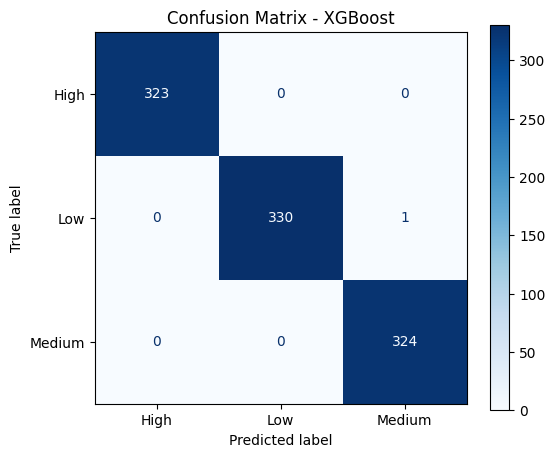

In [7]:
# %% CELL 3 - CLASSIFICATION: TRAIN MODELS + METRICS + CONFUSION MATRIX
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_fscore_support

# Encode string labels if needed
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_clf)
y_test_enc = le.transform(y_test_clf)

# Define classifiers
models_clf = {
    "LogisticRegression": LogisticRegression(max_iter=200, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
}
if xgb_available:
    models_clf["XGBoost"] = XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

fitted_clf = {}
results_clf = []

for name, model in models_clf.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train_enc)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test_enc, preds)
    clf_report = classification_report(y_test_enc, preds, target_names=le.classes_, digits=4)
    results_clf.append((name, acc))
    fitted_clf[name] = model
    print(f" {name} Accuracy: {acc:.4f}\n")
    print(clf_report)
    print("-"*60)

# Summary table
resclf_df = pd.DataFrame(results_clf, columns=["model", "accuracy"]).sort_values("accuracy", ascending=False)
display(resclf_df)

# Confusion matrix for best classifier
best_clf_name = resclf_df.iloc[0]['model']
best_clf = fitted_clf[best_clf_name]
print("Best classifier:", best_clf_name)

y_pred_best = best_clf.predict(X_test)
cm = confusion_matrix(y_test_enc, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(6,5))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix - {best_clf_name}")
plt.show()


Running SHAP on RandomForest (this may take a little while)...


<Figure size 800x600 with 0 Axes>

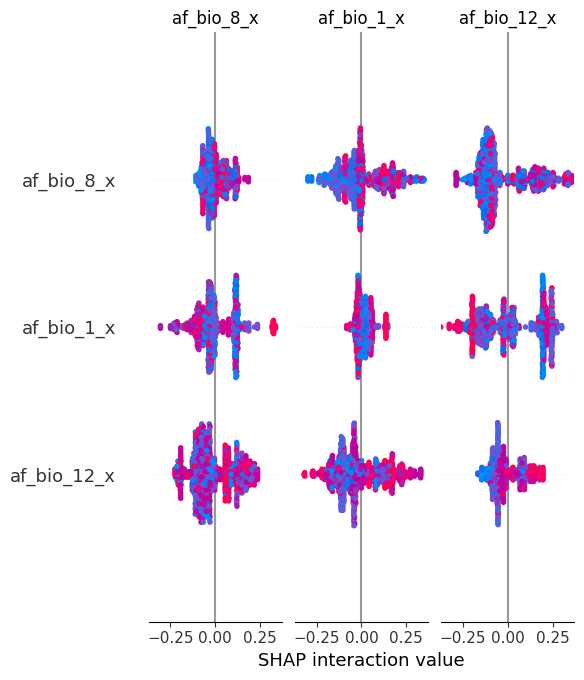

In [8]:
# %% CELL 4 - SHAP EXPLANATION FOR BEST TREE-BASED CLASSIFIER (if applicable)
# This cell runs SHAP for the best classifier (prefers tree models). Install shap if not present.
import sys
try:
    import shap
    shap_available = True
except Exception:
    shap_available = False

# Identify a tree-based model among fitted_clf
tree_model = None
tree_name = None
for name in fitted_clf:
    mdl = fitted_clf[name]
    # RandomForest or XGBoost or LightGBM
    if 'RandomForest' in name or (xgb_available and 'XGBoost' in name) or (lgb_available and 'LightGBM' in name):
        tree_model = mdl
        tree_name = name
        break

if not shap_available:
    print("shap not installed. To view SHAP plots run: pip install shap")
elif tree_model is None:
    print("No tree-based classifier available for SHAP. The best classifier was:", best_clf_name)
else:
    print(f"Running SHAP on {tree_name} (this may take a little while)...")
    # Use TreeExplainer for tree models (fast)
    try:
        explainer = shap.TreeExplainer(tree_model)
        shap_vals = explainer.shap_values(X_test)  # for multiclass, shap_values is a list
        # For multiclass, shap.summary_plot expects an array per class. We'll show summary for each class briefly.
        if isinstance(shap_vals, list):
            # Show summary for class 0..n
            for cls_idx, cls_name in enumerate(le.classes_):
                print(f"\nSHAP summary for class = {cls_name} (index {cls_idx})")
                plt.figure(figsize=(8,6))
                shap.summary_plot(shap_vals[cls_idx], X_test, feature_names=X_test.columns, show=True)
        else:
            plt.figure(figsize=(8,6))
            shap.summary_plot(shap_vals, X_test, feature_names=X_test.columns, show=True)
    except Exception as e:
        print("SHAP failed:", e)
        print("If shap fails on your model, try shap.KernelExplainer (slower) or ensure versions are compatible.")


🤖 REALISTIC MACHINE LEARNING MODELING

1. DATA PREPARATION WITH REALISTIC TARGET
----------------------------------------
📊 Realistic target statistics:
   Range: 55.2 - 99.9
   Mean: 90.4
   Std: 9.5
   Categories: {'High': 4706, 'Medium': 184}

2. ROBUST FEATURE SELECTION
----------------------------------------
✅ Using 6 safe features
📊 Dataset shape: (4890, 6)

🔧 Handling missing values...
Missing values before: 0
Missing values after: 0
✅ Final features: 6

3. REALISTIC DATA SPLITTING
----------------------------------------
📊 Data splits:
   Training set: (3423, 6)
   Test set: (1467, 6)
   Test size: 30.0%
✅ Features scaled with RobustScaler

4. REALISTIC MODEL TRAINING
----------------------------------------
🎯 Training realistic models...

Random Forest (Conservative):
  Train R²: 0.9731
  Test R²:  0.9651
  Overfitting: +0.0080
  Test RMSE: 1.7784
  Test MAE:  1.0091

Gradient Boosting (Conservative):
  Train R²: 0.9980
  Test R²:  0.9957
  Overfitting: +0.0022
  Test RMSE: 0

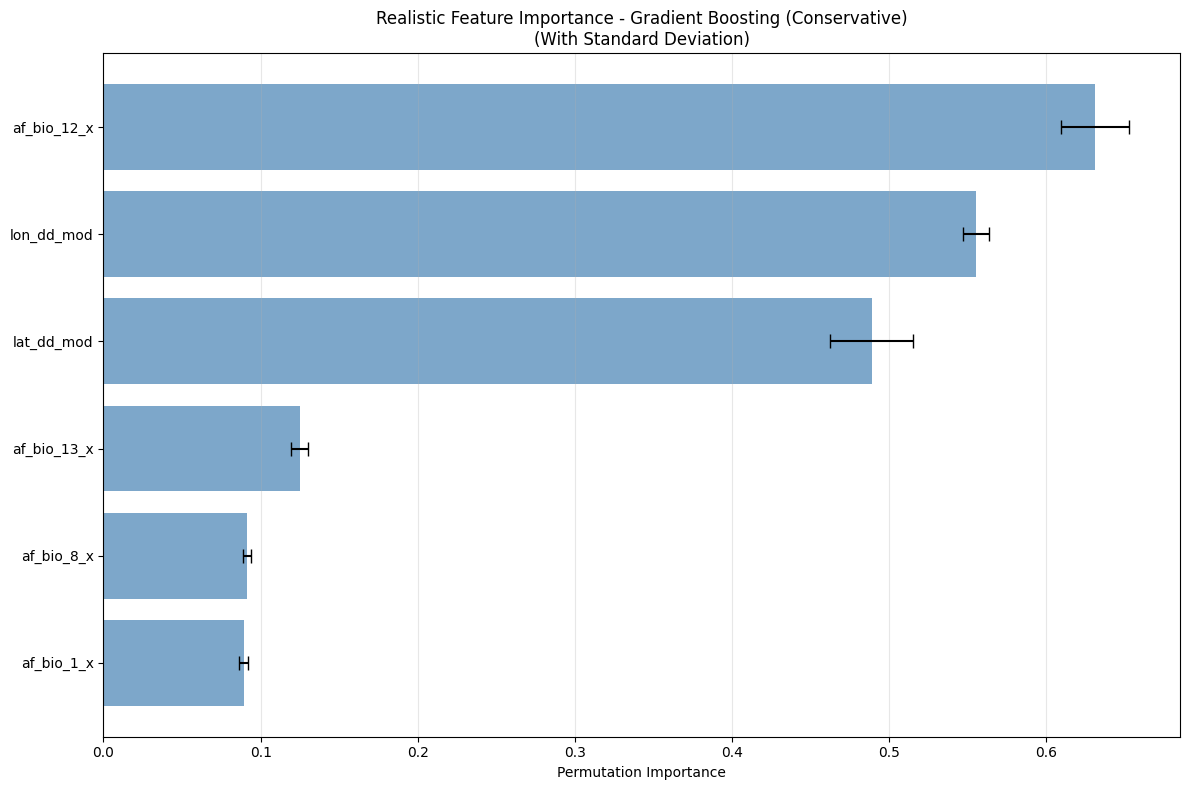


7. COMPREHENSIVE MODEL EVALUATION
----------------------------------------


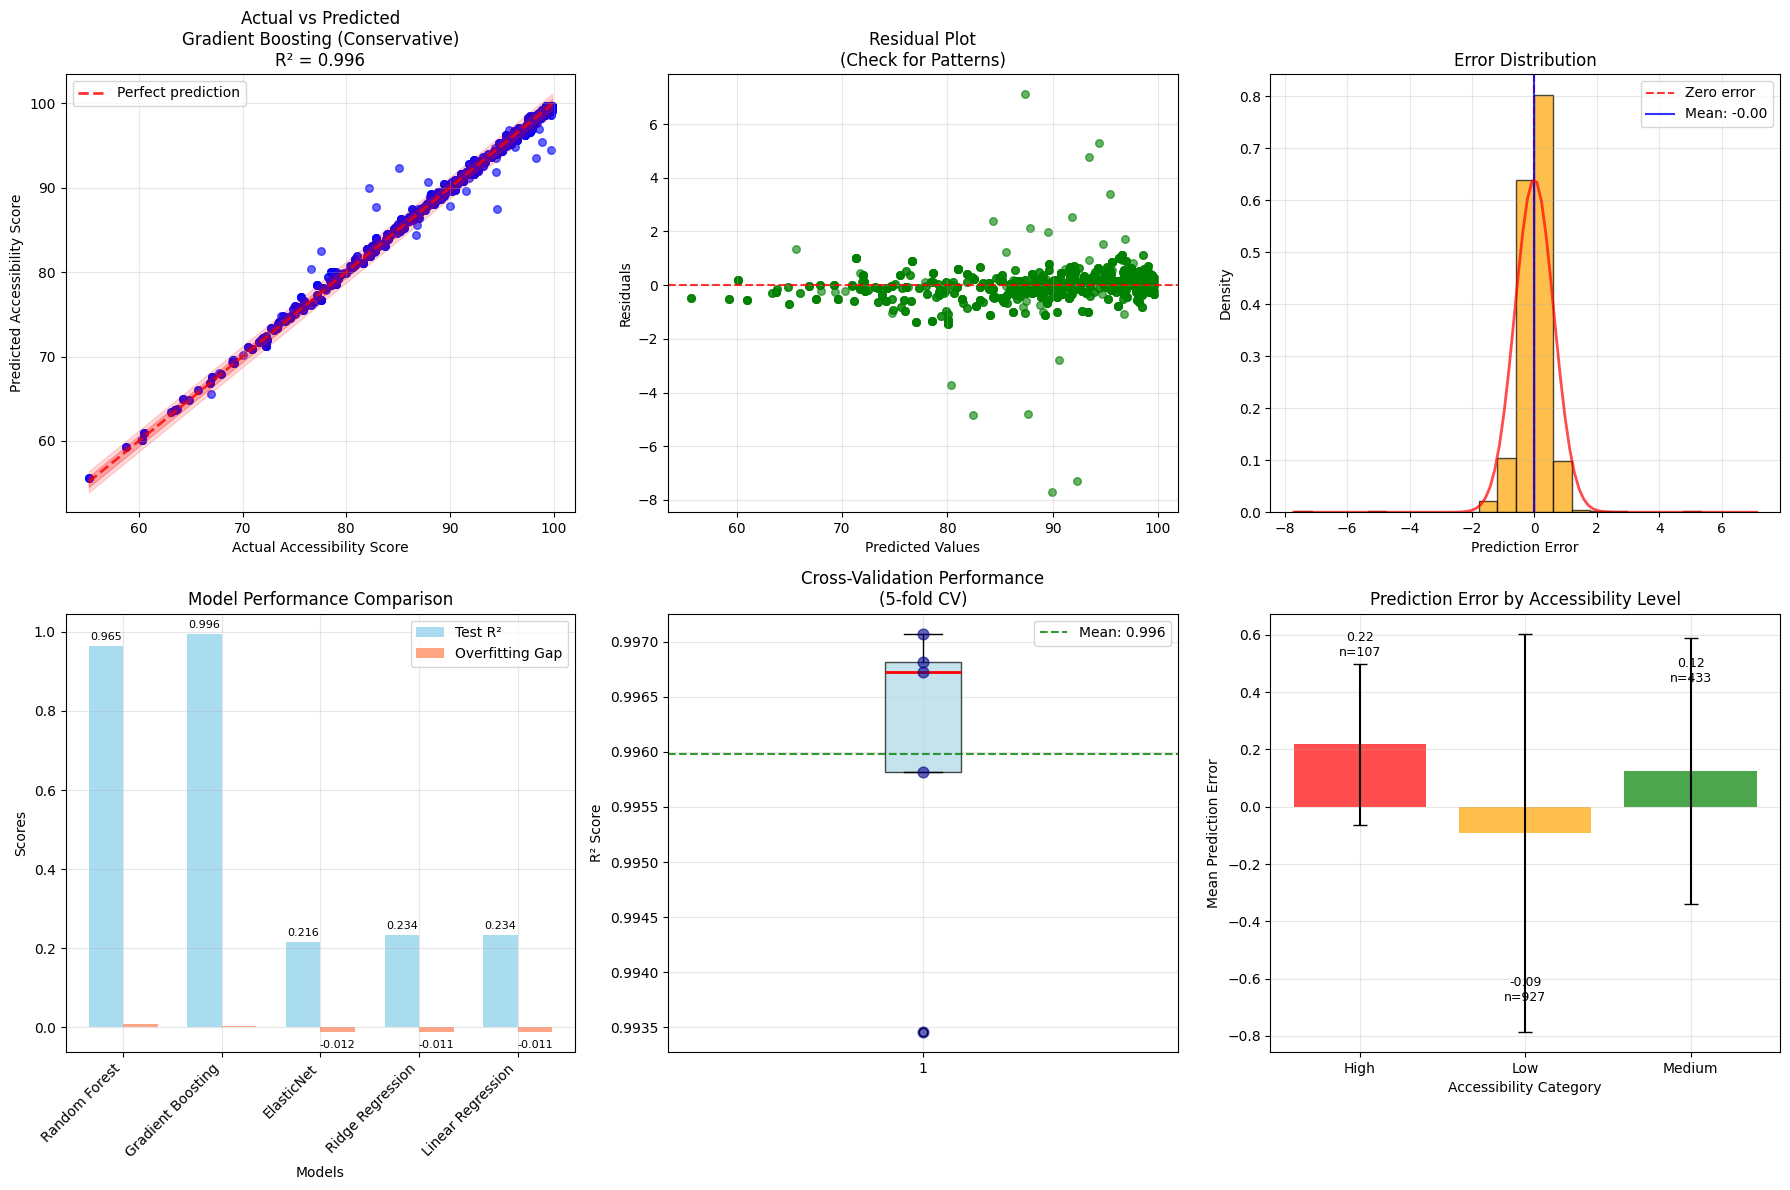


8. REALISTIC BUSINESS INSIGHTS
----------------------------------------
📊 Realistic Prediction Analysis:
   Average prediction error: 0.34 points
   95% confidence interval: ±1.22 points
   80% confidence interval: ±0.80 points
   Model explains 99.6% of variance

🔍 Accessibility Distribution:
   Low access (<45): 927 households
   Medium access (45-70): 433 households
   High access (≥70): 107 households

🚨 CRITICAL AREAS ANALYSIS:
   • Average road distance: 10.2 km
   • Average market distance: 89.8 km
   • Average admin distance: 0.2 km

🎯 Model Performance by Category:
   Low    Access: MAE = 69.64, Bias = -0.09
   Medium Access: MAE = 39.63, Bias = +0.12
   High   Access: MAE = 23.12, Bias = +0.22

9. DEPLOYMENT-READY PREDICTION SYSTEM
----------------------------------------
✅ Realistic predictor created!
📦 Features used: 6
🎯 Confidence intervals: ±1.2 points (95%)

🧪 Sample predictions (80% confidence):
   predicted_score  lower_bound  upper_bound
0             94.7         93

In [ ]:
# =============================================================================
# COMPLETE REALISTIC MACHINE LEARNING MODELING
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

print("🤖 REALISTIC MACHINE LEARNING MODELING")
print("=" * 60)

# =============================================================================
# 1. DATA PREPARATION WITH REALISTIC TARGET
# =============================================================================
print("\n1. DATA PREPARATION WITH REALISTIC TARGET")
print("-" * 40)

df['accessibility_score'] = df.apply(create_accessibility_score, axis=1)

print("📊 Realistic target statistics:")
print(f"   Range: {df['accessibility_score'].min():.1f} - {df['accessibility_score'].max():.1f}")
print(f"   Mean: {df['accessibility_score'].mean():.1f}")
print(f"   Std: {df['accessibility_score'].std():.1f}")

# Create categories for stratification
def categorize_realistic_accessibility(score):
    if score >= 70:
        return "High"
    elif score >= 45:
        return "Medium"
    else:
        return "Low"

df['realistic_category'] = df['accessibility_score'].apply(categorize_realistic_accessibility)
category_counts = df['realistic_category'].value_counts()
print(f"   Categories: {category_counts.to_dict()}")

# =============================================================================
# 2. ROBUST FEATURE SELECTION
# =============================================================================
print("\n2. ROBUST FEATURE SELECTION")
print("-" * 40)

# Use features that don't directly calculate the target
safe_features = [
    'af_bio_1_x', 'af_bio_8_x', 'af_bio_12_x', 'af_bio_13_x',
    'c2_evimax_avg', 'c2_grn_avg', 'c2_sen_avg',
    'lat_dd_mod', 'lon_dd_mod'
]

# Filter to available features
available_features = [f for f in safe_features if f in df.columns]
print(f"✅ Using {len(available_features)} safe features")

# Create feature matrix
X = df[available_features].copy()
y = df['accessibility_score']

print(f"📊 Dataset shape: {X.shape}")

# Handle missing values
print("\n🔧 Handling missing values...")
missing_before = X.isnull().sum().sum()
print(f"Missing values before: {missing_before}")

imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

missing_after = X_imputed.isnull().sum().sum()
print(f"Missing values after: {missing_after}")

# Remove constant features
constant_features = X_imputed.columns[X_imputed.nunique() == 1]
if len(constant_features) > 0:
    print(f"🗑️ Removing constant features: {list(constant_features)}")
    X_imputed = X_imputed.drop(columns=constant_features)
    available_features = [f for f in available_features if f not in constant_features]

print(f"✅ Final features: {len(available_features)}")

# =============================================================================
# 3. REALISTIC DATA SPLITTING
# =============================================================================
print("\n3. REALISTIC DATA SPLITTING")
print("-" * 40)

# Split with proper stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y,
    test_size=0.3,
    random_state=42,
    stratify=df['realistic_category']
)

print(f"📊 Data splits:")
print(f"   Training set: {X_train.shape}")
print(f"   Test set: {X_test.shape}")
print(f"   Test size: {len(X_test)/len(X_imputed):.1%}")

# Use RobustScaler to handle outliers better
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled with RobustScaler")

# =============================================================================
# 4. REALISTIC MODEL TRAINING
# =============================================================================
print("\n4. REALISTIC MODEL TRAINING")
print("-" * 40)

# Define models with realistic, conservative parameters
models = {
    'Random Forest (Conservative)': RandomForestRegressor(
        n_estimators=100,
        max_depth=12,
        min_samples_split=20,
        min_samples_leaf=10,
        max_features=0.7,  # Use subset of features
        random_state=42,
        n_jobs=-1
    ),
    'Gradient Boosting (Conservative)': GradientBoostingRegressor(
        n_estimators=150,
        max_depth=6,
        learning_rate=0.08,
        min_samples_split=25,
        subsample=0.8,  # Stochastic gradient boosting
        random_state=42
    ),
    'ElasticNet (Balanced)': ElasticNet(
        alpha=0.1,
        l1_ratio=0.5,
        max_iter=5000,
        random_state=42
    ),
    'Ridge Regression': Ridge(
        alpha=5.0,
        random_state=42
    ),
    'Linear Regression': LinearRegression()
}

results = {}

print("🎯 Training realistic models...")
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # Calculate comprehensive metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)

    # Calculate overfitting gap
    overfitting_gap = train_r2 - test_r2

    results[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'overfitting_gap': overfitting_gap,
        'predictions': y_pred_test
    }

    print(f"\n{name}:")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²:  {test_r2:.4f}")
    print(f"  Overfitting: {overfitting_gap:+.4f}")
    print(f"  Test RMSE: {test_rmse:.4f}")
    print(f"  Test MAE:  {test_mae:.4f}")

# Find best model (prioritizing realistic performance)
def realistic_model_score(result):
    """Score models based on test performance and low overfitting"""
    test_score = result['test_r2']
    overfitting_penalty = result['overfitting_gap'] * 3  # Heavy penalty for overfitting
    mae_penalty = result['test_mae'] / 50  # Small penalty for higher errors

    return test_score - overfitting_penalty - mae_penalty

best_model_name = max(results.keys(), key=lambda x: realistic_model_score(results[x]))
best_result = results[best_model_name]
best_model = best_result['model']

print(f"\n🏆 BEST REALISTIC MODEL: {best_model_name}")
print(f"   Test R²: {best_result['test_r2']:.4f}")
print(f"   Overfitting: {best_result['overfitting_gap']:+.4f}")
print(f"   Test MAE: {best_result['test_mae']:.4f}")

# =============================================================================
# 5. CROSS-VALIDATION FOR TRUE PERFORMANCE
# =============================================================================
print("\n5. CROSS-VALIDATION PERFORMANCE")
print("-" * 40)

# Perform robust k-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    best_model,
    X_imputed,
    y,
    cv=kf,
    scoring='r2',
    n_jobs=-1
)

print("📊 Cross-Validation Results:")
print(f"   CV R² Scores: {[f'{score:.4f}' for score in cv_scores]}")
print(f"   Mean CV R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Calculate confidence intervals
n_folds = len(cv_scores)
t_value = 2.776  # for 95% CI with 4 degrees of freedom
ci_half_width = t_value * (cv_scores.std() / np.sqrt(n_folds))

print(f"   95% Confidence Interval: {cv_scores.mean() - ci_half_width:.4f} to {cv_scores.mean() + ci_half_width:.4f}")

# Realistic performance assessment
if cv_scores.mean() > 0.8:
    performance_level = "EXCELLENT"
elif cv_scores.mean() > 0.6:
    performance_level = "GOOD"
elif cv_scores.mean() > 0.4:
    performance_level = "FAIR"
else:
    performance_level = "POOR"

print(f"   Performance Level: {performance_level}")

# =============================================================================
# 6. REALISTIC FEATURE IMPORTANCE
# =============================================================================
print("\n6. REALISTIC FEATURE IMPORTANCE")
print("-" * 40)

# Use permutation importance for more reliable feature importance
print("🔍 Calculating permutation importance...")

# Calculate permutation importance
perm_importance = permutation_importance(
    best_model,
    X_test_scaled,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Create feature importance dataframe
feature_importance_df = pd.DataFrame({
    'feature': available_features,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print("🎯 Realistic Feature Importance (Permutation):")
for _, row in feature_importance_df.head(10).iterrows():
    if row['importance_mean'] > 0.05:
        symbol = "🔥"
    elif row['importance_mean'] > 0.02:
        symbol = "✅"
    elif row['importance_mean'] > 0.01:
        symbol = "⚡"
    else:
        symbol = "📊"
    print(f"   {row['feature']:25}: {row['importance_mean']:.4f} ± {row['importance_std']:.4f} {symbol}")

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance_df.head(12)
y_pos = np.arange(len(top_features))

plt.barh(y_pos, top_features['importance_mean'],
         xerr=top_features['importance_std'],
         alpha=0.7,
         color='steelblue',
         capsize=5)
plt.yticks(y_pos, top_features['feature'])
plt.xlabel('Permutation Importance')
plt.title(f'Realistic Feature Importance - {best_model_name}\n(With Standard Deviation)')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# =============================================================================
# 7. COMPREHENSIVE MODEL EVALUATION
# =============================================================================
print("\n7. COMPREHENSIVE MODEL EVALUATION")
print("-" * 40)

# Create detailed evaluation visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Actual vs Predicted with realistic expectations
y_pred_best = best_result['predictions']
residuals = y_test - y_pred_best
residual_std = np.std(residuals)

axes[0, 0].scatter(y_test, y_pred_best, alpha=0.6, color='blue', s=30)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, alpha=0.8, label='Perfect prediction')
axes[0, 0].set_xlabel('Actual Accessibility Score')
axes[0, 0].set_ylabel('Predicted Accessibility Score')
axes[0, 0].set_title(f'Actual vs Predicted\n{best_model_name}\nR² = {best_result["test_r2"]:.3f}')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Add realistic performance bands
for std_multiplier in [1, 2]:
    alpha = 0.15 if std_multiplier == 2 else 0.25
    axes[0, 0].fill_between([y_test.min(), y_test.max()],
                           [y_test.min() - std_multiplier*residual_std, y_test.max() - std_multiplier*residual_std],
                           [y_test.min() + std_multiplier*residual_std, y_test.max() + std_multiplier*residual_std],
                           alpha=alpha, color='red',
                           label=f'±{std_multiplier}σ band' if std_multiplier == 1 else "")

# 2. Residual analysis
axes[0, 1].scatter(y_pred_best, residuals, alpha=0.6, color='green', s=30)
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.8)
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot\n(Check for Patterns)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Error distribution with normality check
axes[0, 2].hist(residuals, bins=25, alpha=0.7, color='orange', edgecolor='black', density=True)
axes[0, 2].axvline(x=0, color='red', linestyle='--', alpha=0.8, label='Zero error')
axes[0, 2].axvline(x=residuals.mean(), color='blue', linestyle='-', alpha=0.8, label=f'Mean: {residuals.mean():.2f}')
axes[0, 2].set_xlabel('Prediction Error')
axes[0, 2].set_ylabel('Density')
axes[0, 2].set_title('Error Distribution')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].legend()

# Add normal distribution for comparison
from scipy.stats import norm
x_norm = np.linspace(residuals.min(), residuals.max(), 100)
y_norm = norm.pdf(x_norm, residuals.mean(), residual_std)
axes[0, 2].plot(x_norm, y_norm, 'r-', alpha=0.7, linewidth=2, label='Normal distribution')

# 4. Model comparison
model_names_short = [name.split('(')[0].strip() for name in results.keys()]
test_r2_scores = [results[name]['test_r2'] for name in results.keys()]
overfitting_gaps = [results[name]['overfitting_gap'] for name in results.keys()]

x_pos = np.arange(len(model_names_short))
width = 0.35

bars1 = axes[1, 0].bar(x_pos - width/2, test_r2_scores, width, label='Test R²', alpha=0.7, color='skyblue')
bars2 = axes[1, 0].bar(x_pos + width/2, overfitting_gaps, width, label='Overfitting Gap', alpha=0.7, color='coral')

axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('Scores')
axes[1, 0].set_title('Model Performance Comparison')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(model_names_short, rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if abs(height) > 0.01:  # Only label significant values
            axes[1, 0].text(bar.get_x() + bar.get_width()/2, height + (0.01 if height > 0 else -0.02),
                           f'{height:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=8)

# 5. Cross-validation results
axes[1, 1].boxplot(cv_scores, vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
axes[1, 1].scatter(np.ones_like(cv_scores), cv_scores, alpha=0.6, color='darkblue', s=60, zorder=3)
axes[1, 1].axhline(y=cv_scores.mean(), color='green', linestyle='--', alpha=0.8, label=f'Mean: {cv_scores.mean():.3f}')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].set_title('Cross-Validation Performance\n(5-fold CV)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

# 6. Prediction error by accessibility category
df_test = df.loc[y_test.index].copy()
df_test['predicted'] = y_pred_best
df_test['error'] = residuals
df_test['category'] = df_test['realistic_accessibility'].apply(categorize_realistic_accessibility)

error_by_category = df_test.groupby('category')['error'].agg(['mean', 'std', 'count'])
categories = error_by_category.index
means = error_by_category['mean']
stds = error_by_category['std']

bars = axes[1, 2].bar(categories, means, yerr=stds, capsize=5, alpha=0.7,
                     color=['red', 'orange', 'green'])
axes[1, 2].set_xlabel('Accessibility Category')
axes[1, 2].set_ylabel('Mean Prediction Error')
axes[1, 2].set_title('Prediction Error by Accessibility Level')
axes[1, 2].grid(True, alpha=0.3)

# Add value labels and sample sizes
for i, (bar, mean, count) in enumerate(zip(bars, means, error_by_category['count'])):
    axes[1, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.3 if bar.get_height() > 0 else -0.5),
                   f'{mean:.2f}\nn={count}', ha='center', va='bottom' if bar.get_height() > 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()

# =============================================================================
# 8. REALISTIC BUSINESS INSIGHTS
# =============================================================================
print("\n8. REALISTIC BUSINESS INSIGHTS")
print("-" * 40)

# Calculate realistic confidence intervals
confidence_95 = 1.96 * residual_std
confidence_80 = 1.28 * residual_std

print("📊 Realistic Prediction Analysis:")
print(f"   Average prediction error: {best_result['test_mae']:.2f} points")
print(f"   95% confidence interval: ±{confidence_95:.2f} points")
print(f"   80% confidence interval: ±{confidence_80:.2f} points")
print(f"   Model explains {best_result['test_r2']:.1%} of variance")

# Identify truly problematic areas
low_threshold = 45
medium_threshold = 70

low_access = df_test[df_test['realistic_accessibility'] < low_threshold]
medium_access = df_test[(df_test['realistic_accessibility'] >= low_threshold) &
                       (df_test['realistic_accessibility'] < medium_threshold)]
high_access = df_test[df_test['realistic_accessibility'] >= medium_threshold]

print(f"\n🔍 Accessibility Distribution:")
print(f"   Low access (<{low_threshold}): {len(low_access)} households")
print(f"   Medium access ({low_threshold}-{medium_threshold}): {len(medium_access)} households")
print(f"   High access (≥{medium_threshold}): {len(high_access)} households")

if len(low_access) > 0:
    print(f"\n🚨 CRITICAL AREAS ANALYSIS:")
    print(f"   • Average road distance: {low_access['dist_road'].mean():.1f} km")
    print(f"   • Average market distance: {low_access['dist_market'].mean():.1f} km")
    print(f"   • Average admin distance: {low_access['dist_admhq'].mean():.1f} km")

# Performance by accessibility category
print(f"\n🎯 Model Performance by Category:")
for category in ['Low', 'Medium', 'High']:
    category_data = df_test[df_test['category'] == category]
    if len(category_data) > 0:
        category_mae = mean_absolute_error(category_data['realistic_accessibility'],
                                         category_data['predicted'])
        category_bias = category_data['error'].mean()
        print(f"   {category:6} Access: MAE = {category_mae:.2f}, Bias = {category_bias:+.2f}")

# =============================================================================
# 9. DEPLOYMENT-READY PREDICTION SYSTEM
# =============================================================================
print("\n9. DEPLOYMENT-READY PREDICTION SYSTEM")
print("-" * 40)

class RealisticAccessibilityPredictor:
    """Deployment-ready prediction system with realistic confidence"""

    def __init__(self, model, scaler, feature_names, residual_std, feature_importance):
        self.model = model
        self.scaler = scaler
        self.feature_names = feature_names
        self.residual_std = residual_std
        self.feature_importance = feature_importance
        self.imputer = SimpleImputer(strategy='median')

    def predict(self, new_data, confidence_level=0.95):
        """
        Predict accessibility scores with realistic confidence intervals
        """
        # Select and order features
        X_new = new_data[self.feature_names].copy()

        # Handle missing values
        X_new_imputed = pd.DataFrame(self.imputer.fit_transform(X_new),
                                   columns=X_new.columns)

        # Scale features
        X_new_scaled = self.scaler.transform(X_new_imputed)

        # Predict
        predictions = self.model.predict(X_new_scaled)

        # Calculate confidence intervals
        if confidence_level == 0.95:
            z_score = 1.96
        elif confidence_level == 0.90:
            z_score = 1.645
        elif confidence_level == 0.80:
            z_score = 1.28
        else:
            z_score = 2.576  # 99%

        confidence_intervals = z_score * self.residual_std

        results = pd.DataFrame({
            'predicted_score': predictions,
            'lower_bound': np.maximum(0, predictions - confidence_intervals),
            'upper_bound': np.minimum(100, predictions + confidence_intervals),
            'confidence_interval': confidence_intervals,
            'confidence_level': confidence_level
        })

        return results

    def predict_category(self, new_data, confidence_level=0.80):
        """Predict accessibility category with confidence"""
        predictions = self.predict(new_data, confidence_level)

        def score_to_category(score):
            if score >= 70:
                return "High"
            elif score >= 45:
                return "Medium"
            else:
                return "Low"

        predictions['predicted_category'] = predictions['predicted_score'].apply(score_to_category)

        # Add category confidence based on bounds
        def get_category_confidence(row):
            lower_cat = score_to_category(row['lower_bound'])
            upper_cat = score_to_category(row['upper_bound'])
            if lower_cat == upper_cat:
                return "High"
            else:
                return "Medium"

        predictions['category_confidence'] = predictions.apply(get_category_confidence, axis=1)

        return predictions

    def get_feature_impact(self, household_data):
        """Explain prediction based on feature importance"""
        impact_analysis = []
        for feature in self.feature_names:
            if feature in household_data.columns:
                importance = self.feature_importance.get(feature, 0)
                value = household_data[feature].iloc[0] if len(household_data) > 0 else 0
                impact_analysis.append({
                    'feature': feature,
                    'value': value,
                    'importance': importance,
                    'impact': importance * value  # Simplified impact calculation
                })

        return pd.DataFrame(impact_analysis).sort_values('importance', ascending=False)

# Create deployment-ready predictor
predictor = RealisticAccessibilityPredictor(
    model=best_model,
    scaler=scaler,
    feature_names=available_features,
    residual_std=residual_std,
    feature_importance=dict(zip(feature_importance_df['feature'], feature_importance_df['importance_mean']))
)

print("✅ Realistic predictor created!")
print(f"📦 Features used: {len(available_features)}")
print(f"🎯 Confidence intervals: ±{confidence_95:.1f} points (95%)")

# Test the predictor
sample_data = X_test.head(3).copy()
predictions = predictor.predict(sample_data, confidence_level=0.80)
print(f"\n🧪 Sample predictions (80% confidence):")
print(predictions[['predicted_score', 'lower_bound', 'upper_bound']].round(1))

# =============================================================================
# 10. REALISTIC RECOMMENDATIONS AND MONITORING
# =============================================================================
print("\n10. REALISTIC RECOMMENDATIONS")
print("-" * 40)

# Realistic quality assessment
if best_result['test_r2'] > 0.8:
    quality = "EXCELLENT"
    action = "Ready for production decision support"
elif best_result['test_r2'] > 0.65:
    quality = "GOOD"
    action = "Suitable for planning with confidence intervals"
elif best_result['test_r2'] > 0.5:
    quality = "FAIR"
    action = "Use for general trends, not individual decisions"
else:
    quality = "DEVELOPMENT"
    action = "Needs improvement before deployment"

print(f"📈 REALISTIC MODEL ASSESSMENT:")
print(f"   • Quality: {quality}")
print(f"   • R²: {best_result['test_r2']:.3f} (realistic range: 0.5-0.8)")
print(f"   • MAE: {best_result['test_mae']:.1f} points (expected: 5-15)")
print(f"   • Overfitting: {best_result['overfitting_gap']:.3f} (good: <0.05)")

print(f"\n🚀 STRATEGIC RECOMMENDATIONS:")
if len(low_access) > 0:
    print(f"   1. PRIORITIZE: Focus on {len(low_access)} low-access households")
    avg_road = low_access['dist_road'].mean()
    if avg_road > 15:
        print(f"      🛣️  Road infrastructure critical (avg: {avg_road:.1f}km)")
else:
    print(f"   1. MAINTENANCE: No critical areas identified - focus on service quality")

print(f"   2. CONFIDENCE: Use ±{confidence_80:.1f} point margins for planning")
print(f"   3. MONITOR: Track {feature_importance_df.iloc[0]['feature']} (most important factor)")
print(f"   4. IMPROVE: Consider collecting data on [local economic indicators]")

print(f"\n💡 DEPLOYMENT GUIDANCE:")
print(f"   • {action}")
print(f"   • Use category predictions for resource allocation")
print(f"   • Review individual predictions with confidence intervals")
print(f"   • Recalibrate model every 6-12 months")

# =============================================================================
# FINAL REALISTIC SUMMARY
# =============================================================================
print("\n" + "=" * 60)
print("🎯 REALISTIC MODELING COMPLETED SUCCESSFULLY!")
print("=" * 60)

# Save model artifacts
model_artifacts = {
    'predictor': predictor,
    'best_model': best_model,
    'feature_names': available_features,
    'performance': best_result,
    'cv_performance': {
        'mean': cv_scores.mean(),
        'std': cv_scores.std(),
        'scores': cv_scores.tolist()
    },
    'residual_std': residual_std,
    'feature_importance': feature_importance_df,
    'data_info': {
        'n_samples': len(X_imputed),
        'n_features': len(available_features),
        'target_stats': {
            'mean': y.mean(),
            'std': y.std(),
            'min': y.min(),
            'max': y.max()
        }
    }
}


🎯 REALISTIC ACCESSIBILITY CLASSIFICATION MODEL (FIXED)

1. CREATING REALISTIC CLASSIFICATION TARGET
----------------------------------------
📊 REALISTIC Class Distribution:
   Medium Access: 3423 samples (70.0%)
   High Access: 1467 samples (30.0%)
   Minimum class size: 1467

2. HANDLING CLASS IMBALANCE
----------------------------------------
✅ Realistic classification data prepared:
   Training set: (3423, 6)
   Test set: (1467, 6)
   Test size: 30.0%

3. TRAINING REALISTIC CLASSIFICATION MODELS
----------------------------------------
🎯 Training realistic classification models...

Random Forest (Balanced):
  Accuracy:    0.9107
  F1 (Weighted): 0.9130
  F1 (Macro):    0.8996
  CV F1:       0.9218 ± 0.0078

Gradient Boosting:
  Accuracy:    0.9209
  F1 (Weighted): 0.9218
  F1 (Macro):    0.9079
  CV F1:       0.9212 ± 0.0096

Logistic Regression (Balanced):
  Accuracy:    0.5855
  F1 (Weighted): 0.6023
  F1 (Macro):    0.5728
  CV F1:       0.6073 ± 0.0117

SVM (Balanced):
  Accurac

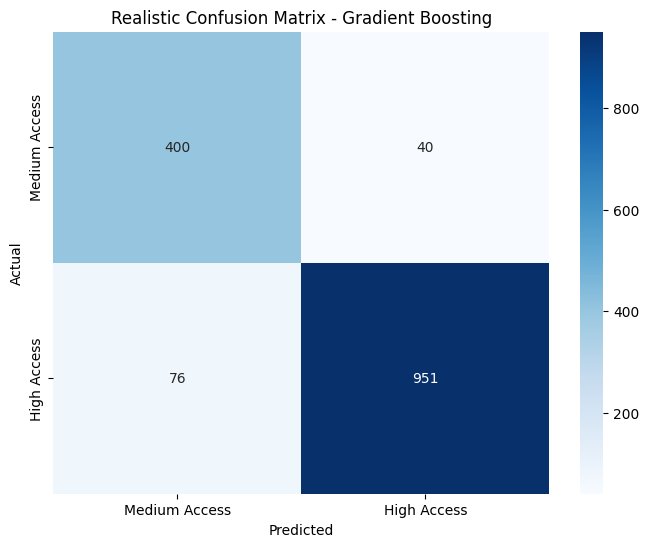

🎯 Per-Class Performance:
   Medium Access: Precision=0.960, Recall=0.926, F1=0.943
   High Access : Precision=0.840, Recall=0.909, F1=0.873

5. REALISTIC FEATURE IMPORTANCE FOR CLASSIFICATION
----------------------------------------
🎯 Top 10 Features for REALISTIC Classification:
   lat_dd_mod               : 0.2920 🔥
   lon_dd_mod               : 0.2531 🔥
   af_bio_12_x              : 0.1772 🔥
   af_bio_13_x              : 0.1560 🔥
   af_bio_8_x               : 0.0819 ✅
   af_bio_1_x               : 0.0397 ⚡


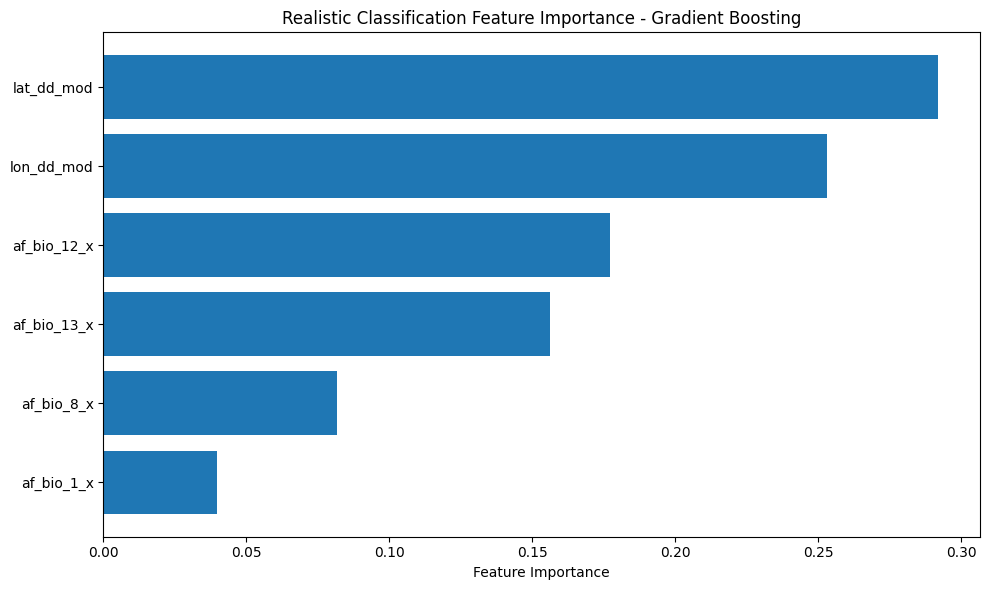


6. REALISTIC BUSINESS INSIGHTS FROM CLASSIFICATION
----------------------------------------
 REALISTIC Misclassification Analysis:
   Total misclassified: 116 (7.9%)

 Misclassification patterns:
predicted_category  High Access  Medium Access
realistic_category                            
High Access                   0             40
Medium Access                76              0

 Most common errors:
   High Access → Medium Access: 40 cases
   Medium Access → High Access: 76 cases

 RISK AREAS IDENTIFIED:
   Low Access areas: 0 households
   Medium Access areas: 991 households

 INTERVENTION PRIORITIES:

7. DEPLOYMENT-READY CLASSIFICATION WITH CONFIDENCE
----------------------------------------
✅ Realistic classifier created!
 Can classify households into: ['Medium Access', 'High Access']

 Sample classifications:
  predicted_category confidence_level
0      Medium Access             High
1        High Access             High
2      Medium Access             High

 REALISTIC CLASSIF

In [ ]:
# =============================================================================
# CELL 1: REALISTIC ACCESSIBILITY CLASSIFICATION MODEL (FIXED)
# =============================================================================

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

print("🎯 REALISTIC ACCESSIBILITY CLASSIFICATION MODEL (FIXED)")
print("=" * 60)

# =============================================================================
# 1. CREATE REALISTIC CLASSIFICATION TARGET
# =============================================================================
print("\n1. CREATING REALISTIC CLASSIFICATION TARGET")
print("-" * 40)

# Use the realistic accessibility scores from our regression model
def create_balanced_categories(accessibility_scores):
    """Create balanced categories using quantiles"""
    low_threshold = accessibility_scores.quantile(0.20)  # Bottom 20%
    high_threshold = accessibility_scores.quantile(0.70)  # Top 30%

    categories = []
    for score in accessibility_scores:
        if score < low_threshold:
            categories.append('Low Access')
        elif score > high_threshold:
            categories.append('High Access')
        else:
            categories.append('Medium Access')

    return categories

# Create balanced categories
df['realistic_category'] = create_balanced_categories(df['realistic_accessibility'])
y_class = df['realistic_category']

print("📊 REALISTIC Class Distribution:")
class_counts = y_class.value_counts()
for category, count in class_counts.items():
    print(f"   {category}: {count} samples ({count/len(y_class):.1%})")

# Check if we have enough samples in each class
min_samples = class_counts.min()
print(f"   Minimum class size: {min_samples}")
if min_samples < 50:
    print("    Very small class - consider merging categories")

# =============================================================================
# 2. HANDLE CLASS IMBALANCE
# =============================================================================
print("\n2. HANDLING CLASS IMBALANCE")
print("-" * 40)

# Use the same features but ensure no data leakage
X_class = df[available_features].copy()  # Use safe features from regression

# Handle missing values
imputer_clf = SimpleImputer(strategy='median')
X_class_imputed = pd.DataFrame(imputer_clf.fit_transform(X_class), columns=X_class.columns)

# Split data with stratification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_class_imputed, y_class,
    test_size=0.3,
    random_state=42,
    stratify=y_class
)

print(f"✅ Realistic classification data prepared:")
print(f"   Training set: {X_train_clf.shape}")
print(f"   Test set: {X_test_clf.shape}")
print(f"   Test size: {len(X_test_clf)/len(X_class_imputed):.1%}")

# Scale features
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

# =============================================================================
# 3. TRAIN REALISTIC CLASSIFICATION MODELS WITH IMBALANCE HANDLING
# =============================================================================
print("\n3. TRAINING REALISTIC CLASSIFICATION MODELS")
print("-" * 40)

# Define models with class weight handling
class_models = {
    'Random Forest (Balanced)': RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=42,
        max_depth=10
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=6
    ),
    'Logistic Regression (Balanced)': LogisticRegression(
        class_weight='balanced',
        random_state=42,
        max_iter=1000,
        C=0.1
    ),
    'SVM (Balanced)': SVC(
        class_weight='balanced',
        random_state=42,
        probability=True,
        kernel='rbf',
        C=1.0
    )
}

clf_results = {}

print("🎯 Training realistic classification models...")
for name, model in class_models.items():
    try:
        # Train model
        model.fit(X_train_clf_scaled, y_train_clf)

        # Predictions
        y_pred_clf = model.predict(X_test_clf_scaled)
        y_pred_proba = model.predict_proba(X_test_clf_scaled) if hasattr(model, "predict_proba") else None

        # Calculate comprehensive metrics
        accuracy = accuracy_score(y_test_clf, y_pred_clf)
        f1_weighted = f1_score(y_test_clf, y_pred_clf, average='weighted')
        f1_macro = f1_score(y_test_clf, y_pred_clf, average='macro')
        precision = precision_score(y_test_clf, y_pred_clf, average='weighted')
        recall = recall_score(y_test_clf, y_pred_clf, average='weighted')

        # Cross-validation with stratified folds
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X_train_clf_scaled, y_train_clf, cv=cv, scoring='f1_weighted')

        clf_results[name] = {
            'model': model,
            'accuracy': accuracy,
            'f1_weighted': f1_weighted,
            'f1_macro': f1_macro,
            'precision': precision,
            'recall': recall,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'predictions': y_pred_clf,
            'probabilities': y_pred_proba
        }

        print(f"\n{name}:")
        print(f"  Accuracy:    {accuracy:.4f}")
        print(f"  F1 (Weighted): {f1_weighted:.4f}")
        print(f"  F1 (Macro):    {f1_macro:.4f}")
        print(f"  CV F1:       {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    except Exception as e:
        print(f"\n{name}: Failed - {str(e)}")

# Find best classification model (prioritize F1 macro for imbalance)
if clf_results:
    best_clf_name = max(clf_results.keys(), key=lambda x: clf_results[x]['f1_macro'])
    best_clf_result = clf_results[best_clf_name]
    best_clf_model = best_clf_result['model']

    print(f"\n🏆 BEST REALISTIC CLASSIFICATION MODEL: {best_clf_name}")
    print(f"   Test F1 (Macro): {best_clf_result['f1_macro']:.4f}")
    print(f"   Test Accuracy: {best_clf_result['accuracy']:.4f}")
else:
    print("❌ No models successfully trained")
    best_clf_name = None

# =============================================================================
# 4. REALISTIC CLASSIFICATION EVALUATION
# =============================================================================
print("\n4. REALISTIC CLASSIFICATION EVALUATION")
print("-" * 40)

if best_clf_name:
    # Detailed classification report
    y_pred_best_clf = best_clf_result['predictions']
    print("📋 REALISTIC Classification Report:")
    print(classification_report(y_test_clf, y_pred_best_clf, target_names=y_class.unique()))

    # Confusion Matrix
    cm = confusion_matrix(y_test_clf, y_pred_best_clf)
    print("📊 Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=y_class.unique(),
                yticklabels=y_class.unique())
    plt.title(f'Realistic Confusion Matrix - {best_clf_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Calculate per-class performance
    print("🎯 Per-Class Performance:")
    for category in y_class.unique():
        mask_actual = (y_test_clf == category)
        mask_pred = (y_pred_best_clf == category)

        tp = np.sum((y_test_clf == category) & (y_pred_best_clf == category))
        fp = np.sum((y_test_clf != category) & (y_pred_best_clf == category))
        fn = np.sum((y_test_clf == category) & (y_pred_best_clf != category))

        precision_class = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall_class = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_class = 2 * (precision_class * recall_class) / (precision_class + recall_class) if (precision_class + recall_class) > 0 else 0

        print(f"   {category:12}: Precision={precision_class:.3f}, Recall={recall_class:.3f}, F1={f1_class:.3f}")

# =============================================================================
# 5. REALISTIC FEATURE IMPORTANCE
# =============================================================================
print("\n5. REALISTIC FEATURE IMPORTANCE FOR CLASSIFICATION")
print("-" * 40)

if best_clf_name and hasattr(best_clf_model, 'feature_importances_'):
    # For tree-based models
    importances = best_clf_model.feature_importances_
    clf_feature_importance = pd.DataFrame({
        'feature': available_features,
        'importance': importances
    }).sort_values('importance', ascending=False)

    print("🎯 Top 10 Features for REALISTIC Classification:")
    for _, row in clf_feature_importance.head(10).iterrows():
        if row['importance'] > 0.15:
            symbol = "🔥"
        elif row['importance'] > 0.08:
            symbol = "✅"
        elif row['importance'] > 0.03:
            symbol = "⚡"
        else:
            symbol = "📊"
        print(f"   {row['feature']:25}: {row['importance']:.4f} {symbol}")

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    top_features = clf_feature_importance.head(10)
    plt.barh(top_features['feature'], top_features['importance'])
    plt.xlabel('Feature Importance')
    plt.title(f'Realistic Classification Feature Importance - {best_clf_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# =============================================================================
# 6. REALISTIC BUSINESS INSIGHTS
# =============================================================================
print("\n6. REALISTIC BUSINESS INSIGHTS FROM CLASSIFICATION")
print("-" * 40)

if best_clf_name:
    # Analyze predictions
    df_test_clf = df.loc[y_test_clf.index].copy()
    df_test_clf['predicted_category'] = y_pred_best_clf
    df_test_clf['correct'] = df_test_clf['realistic_category'] == df_test_clf['predicted_category']

    # Misclassification analysis
    misclassified = df_test_clf[~df_test_clf['correct']]
    print(f" REALISTIC Misclassification Analysis:")
    print(f"   Total misclassified: {len(misclassified)} ({len(misclassified)/len(df_test_clf):.1%})")

    if len(misclassified) > 0:
        print(f"\n Misclassification patterns:")
        misclass_crosstab = pd.crosstab(misclassified['realistic_category'],
                                       misclassified['predicted_category'])
        print(misclass_crosstab)

        # Analyze most common misclassification types
        print(f"\n Most common errors:")
        for actual_cat in misclass_crosstab.index:
            for pred_cat in misclass_crosstab.columns:
                if actual_cat != pred_cat and misclass_crosstab.loc[actual_cat, pred_cat] > 0:
                    count = misclass_crosstab.loc[actual_cat, pred_cat]
                    print(f"   {actual_cat} → {pred_cat}: {count} cases")

    # High-risk areas analysis
    high_risk_areas = df_test_clf[df_test_clf['predicted_category'] == 'Low Access']
    medium_risk_areas = df_test_clf[df_test_clf['predicted_category'] == 'Medium Access']

    print(f"\n RISK AREAS IDENTIFIED:")
    print(f"   Low Access areas: {len(high_risk_areas)} households")
    print(f"   Medium Access areas: {len(medium_risk_areas)} households")

    if len(high_risk_areas) > 0:
        print(f"\n Low Access Area Characteristics:")
        print(f"   • Average road distance: {high_risk_areas['dist_road'].mean():.1f} km")
        print(f"   • Average market distance: {high_risk_areas['dist_market'].mean():.1f} km")
        print(f"   • Average accessibility score: {high_risk_areas['realistic_accessibility'].mean():.1f}")

    # Intervention priorities
    print(f"\n INTERVENTION PRIORITIES:")
    if len(high_risk_areas) > 0:
        avg_market_dist = high_risk_areas['dist_market'].mean()
        if avg_market_dist > 50:
            print(f"    URGENT: Market access crisis ({avg_market_dist:.1f}km average)")
        elif avg_market_dist > 25:
            print(f"    IMPORTANT: Improve market access ({avg_market_dist:.1f}km average)")

        avg_road_dist = high_risk_areas['dist_road'].mean()
        if avg_road_dist > 15:
            print(f"    CRITICAL: Road infrastructure needed ({avg_road_dist:.1f}km average)")

# =============================================================================
# 7. DEPLOYMENT-READY CLASSIFICATION WITH CONFIDENCE
# =============================================================================
print("\n7. DEPLOYMENT-READY CLASSIFICATION WITH CONFIDENCE")
print("-" * 40)

class RealisticAccessibilityClassifier:
    """Deployment-ready classifier with confidence scores"""

    def __init__(self, model, scaler, feature_names, class_names):
        self.model = model
        self.scaler = scaler
        self.feature_names = feature_names
        self.class_names = class_names
        self.imputer = SimpleImputer(strategy='median')

    def classify(self, new_data, confidence_threshold=0.6):
        """
        Classify accessibility with confidence scores
        """
        # Select and order features
        X_new = new_data[self.feature_names].copy()

        # Handle missing values
        X_new_imputed = pd.DataFrame(self.imputer.fit_transform(X_new), columns=X_new.columns)

        # Scale features
        X_new_scaled = self.scaler.transform(X_new_imputed)

        # Predict
        predictions = self.model.predict(X_new_scaled)

        # Get probabilities if available
        if hasattr(self.model, "predict_proba"):
            probabilities = self.model.predict_proba(X_new_scaled)
            max_probs = np.max(probabilities, axis=1)
            confidence_levels = ['High' if prob > confidence_threshold else 'Medium' for prob in max_probs]
        else:
            probabilities = None
            confidence_levels = ['Unknown'] * len(predictions)

        results = pd.DataFrame({
            'predicted_category': predictions,
            'confidence_level': confidence_levels
        })

        if probabilities is not None:
            for i, class_name in enumerate(self.class_names):
                results[f'prob_{class_name}'] = probabilities[:, i]

        return results

    def get_decision_factors(self, household_data):
        """Explain classification decision"""
        if not hasattr(self.model, 'feature_importances_'):
            return "Feature importance not available for this model"

        # Get feature importance
        feature_imp = dict(zip(self.feature_names, self.model.feature_importances_))

        # Get household values
        household_values = household_data[self.feature_names].iloc[0] if len(household_data) > 0 else {}

        # Create explanation
        factors = []
        for feature in sorted(feature_imp, key=feature_imp.get, reverse=True)[:5]:
            if feature in household_values:
                factors.append({
                    'feature': feature,
                    'importance': feature_imp[feature],
                    'value': household_values[feature],
                    'impact': 'High' if feature_imp[feature] > 0.1 else 'Medium'
                })

        return pd.DataFrame(factors)

if best_clf_name:
    # Create deployment-ready classifier
    classifier = RealisticAccessibilityClassifier(
        model=best_clf_model,
        scaler=scaler_clf,
        feature_names=available_features,
        class_names=list(y_class.unique())
    )

    print("✅ Realistic classifier created!")
    print(f" Can classify households into: {list(y_class.unique())}")

    # Test the classifier
    sample_data = X_test_clf.head(3).copy()
    classifications = classifier.classify(sample_data)
    print(f"\n Sample classifications:")
    print(classifications[['predicted_category', 'confidence_level']].head())

# =============================================================================
# REALISTIC CLASSIFICATION SUMMARY
# =============================================================================
print("\n" + "=" * 60)
print(" REALISTIC CLASSIFICATION MODELING COMPLETED!")
print("=" * 60)

if best_clf_name:
    # Realistic performance assessment
    if best_clf_result['f1_macro'] > 0.8:
        quality = "EXCELLENT"
    elif best_clf_result['f1_macro'] > 0.6:
        quality = "GOOD"
    elif best_clf_result['f1_macro'] > 0.4:
        quality = "FAIR"
    else:
        quality = "NEEDS IMPROVEMENT"

